<a href="https://colab.research.google.com/github/hitesh-bhatnagar/Heart-Disease_prediction/blob/main/00_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning modelling tutorial with python and scikit learn

In [1]:
import datetime
print("Last updated: {datetime.datetime.now()}")

Last updated: {datetime.datetime.now()}


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


## Random Forest Classifier Workflow for Classifying Heart Disease

1. Get the data

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hiteshbhatnagar","key":"e201a58ba519471d1d6c10af03d3d68e"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!ls

kaggle.json  sample_data


In [7]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 14.9MB/s]


In [8]:
import os
os.listdir()

['.config', 'kaggle.json', 'heart-disease-dataset.zip', 'sample_data']

In [9]:
!unzip heart-disease-dataset.zip -d /content/

Archive:  heart-disease-dataset.zip
  inflating: /content/heart.csv      


In [10]:
!ls

heart.csv  heart-disease-dataset.zip  kaggle.json  sample_data


In [11]:
heart_disease= pd.read_csv('heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Target column indicates whether the patient has heart disease or not

In [12]:
# Create X (all the feature columns)
x= heart_disease.drop('target',axis =1)

# create y ( the target column)
y= heart_disease['target']

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
# check the head and the value counts of the labels
y.head() , y.value_counts()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64,
 target
 1    526
 0    499
 Name: count, dtype: int64)

Now , to spilt the dataset to train and test

as in, model will train on training set to learn patterns and those patterns can be evaluated on the test set

Note : model should never see testing data during training

But the is also validation set but for now we'll use only train and test

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x,
                                                     y,
                                                     test_size = 0.25)
 # by default train_test_split uses 25% of the data for the test set

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((768, 13), (257, 13), (768,), (257,))

## since we are working on a classification problem we'll start with a RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier()

We can see current hyperparameters with

```
get_params()
```



In [16]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we'll start fitting a model on the training split(x_train, y_train)

In [17]:
clf.fit(X = x_train, y= y_train)

RandomForestClassifier()

Since the model was trained on data from x_train, predictions should be made on data in the same format and shape as x_train

In [18]:
# In order to predict a label , data has to be in the same shape as x_train
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
411,56,1,0,125,249,1,0,144,1,1.2,1,1,2
993,43,1,0,132,247,1,0,143,1,0.1,1,4,3
740,44,1,2,140,235,0,0,180,0,0.0,2,0,2
920,39,1,0,118,219,0,1,140,0,1.2,1,0,3
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2


In [19]:
# use the model to predict on the test data (further evaluation)

y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

Each model or estimator has built-in method
```
score()
```
for each model uses a standard evaluation metric to measure your models results.

In [20]:
# Evaluate the model on the training set

train_acc = clf.score(X=x_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")

The model's accuracy on the training dataset is: 100.0%


Now, to check our model on test dataset

In [21]:
# evaluate the model on the test set

test_acc = clf.score(X= x_test, y=y_test)
print(f"The model's accuracy on the testing dataset is : {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is : 100.00%


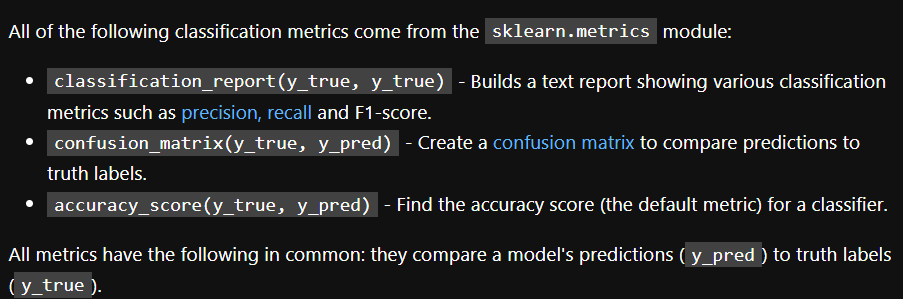

In [22]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

# create a classification report

print(classification_report(y_test , y_preds))

# create a confusion matrix
print('             Confusion Matrix')
print('')
print(confusion_matrix(y_test , y_preds))

# calculate the accuracy
print('             Accuracy_score')
print('')
print(accuracy_score(y_test , y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       128

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

             Confusion Matrix

[[129   0]
 [  0 128]]
             Accuracy_score

1.0


## The first model you build is the baseline

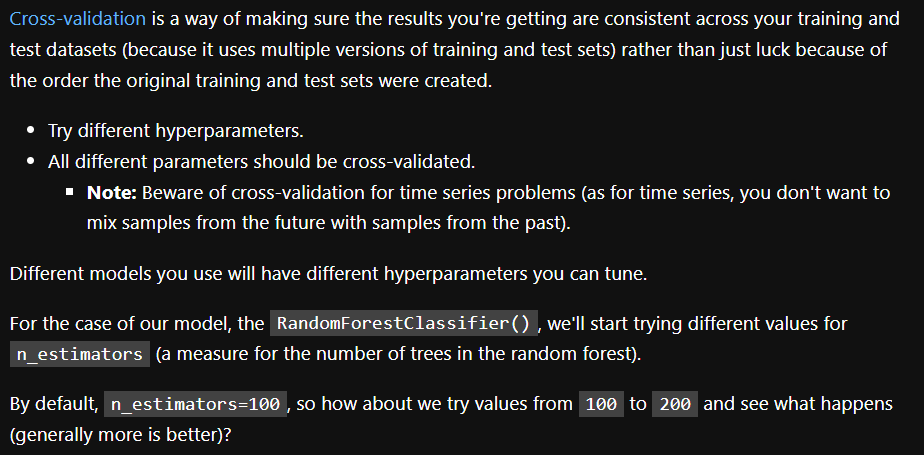

In [23]:
# try differnt numbers of estimators (trees) ... (no cross_validation)
np.random.seed(42)
for i in range(100,200,10) :
  print(f"Trying model with {i} estimators...")
  model = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
  print(f"model accuracy on test set: {model.score(x_test, y_test)*100:.2f}%")
  print("")

Trying model with 100 estimators...
model accuracy on test set: 100.00%

Trying model with 110 estimators...
model accuracy on test set: 100.00%

Trying model with 120 estimators...
model accuracy on test set: 100.00%

Trying model with 130 estimators...
model accuracy on test set: 100.00%

Trying model with 140 estimators...
model accuracy on test set: 100.00%

Trying model with 150 estimators...
model accuracy on test set: 100.00%

Trying model with 160 estimators...
model accuracy on test set: 100.00%

Trying model with 170 estimators...
model accuracy on test set: 100.00%

Trying model with 180 estimators...
model accuracy on test set: 100.00%

Trying model with 190 estimators...
model accuracy on test set: 100.00%



## Let's use this to measure the results across 5 different train and test sets


```
sklearn.model_selection.cross_val_score
```

we can achieve by setting


```
cross_val_score(X, y ,cv=5)
```
cv -> number of train and test splits
cross_val_score will automatically create from the data




In [24]:
from sklearn.model_selection import cross_val_score

# with cross- validation
np.random.seed(42)
for i in range(100,200 ,10) :
  print(f"Trying model with {i} estimators...")

  model = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)

  # Measire the model score on a single train/test split
  model_score = model.score(x_test, y_test)
  print(f"model accuracy on test set: {model_score*100:.2f}%")

  # Measure the mean cross-validation score across 5 different train and test splits
  cross_val_mean = np.mean(cross_val_score(model, x, y, cv=5))
  print(f"cross validation mean: {cross_val_mean*100:.2f}%")
  print("")


Trying model with 100 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 110 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 120 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 130 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.41%

Trying model with 140 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 150 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 160 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 170 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 180 estimators...
model accuracy on test set: 100.00%
cross validation mean: 99.71%

Trying model with 190 estimators...
model accuracy on test set: 100.00%
c

which model had the best cross-validation score?
This is usually a better indicator of aqoality model than a single split accuracy score

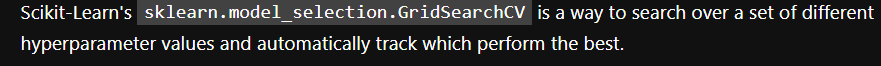

In [30]:
# Another way to do it with GridSearchCV

np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over in dictionary form
# (these can be any of your target model's hyperparameters)
param_grid = {'n_estimators': [i for i in range(100, 200, 10)]}

# Setup the grid search
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=param_grid,
                    cv=5,
                    verbose=1)

# Fit the grid search to the data
grid.fit(x, y)

# Find the best parameters
print(f"The best parameter values are: {grid.best_params_}")
print(f"With a score of: {grid.best_score_*100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameter values are: {'n_estimators': 100}
With a score of: 99.71%


We can extract the best model/estimator with best_estimator attribute

In [31]:
# seth the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier()

We got the best criss-validated model we can fit and score it on our original single train/test split of the data.

In [33]:
# Fit the model

clf = clf.fit(x_train, y_train)

# Find the best model scores on our single test split
#  note: this may be lower than the cross-validation score since it's only on the split of the data)

print(f"Best model score on single split of the data: {clf.score(x_test, y_test)*100:.2f}%")


Best model score on single split of the data: 100.00%


## Saving the model to use by anyone

use scikit learn model using python's in built pickle module but for larger model use joblib

In [44]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [46]:
from google.colab import drive
drive.mount('/content/drive')

# copy the model to google drive
!cp random_forest_model.pkl /content/drive/MyDrive/

Mounted at /content/drive


In [47]:
model = joblib.load('/content/drive/MyDrive/random_forest_model.pkl')

In [48]:
from google.colab import files

# Download the model
files.download('/content/random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>